# Lena_Resizing

In [2]:
from PIL import Image

image = Image.open('Lenna_(test_image).png')
print(f"Original size : {image.size}") # 5464x3640

sunset_resized = image.resize((1024, 1024))
sunset_resized.save('Lenna_resize.png')

Original size : (512, 512)


In [4]:
img = Image.open('Lenna_resize.png')

# Lena Image

In [30]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
image = 'Lenna_resize.png'

In [3]:
img = imread(image)

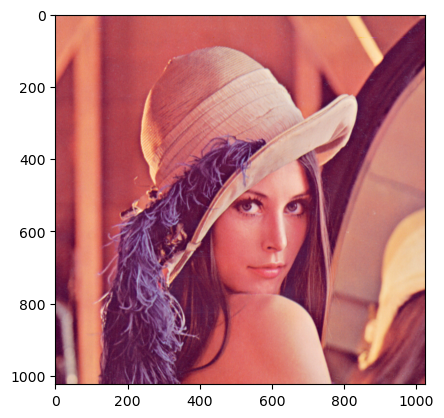

In [4]:
plt.imshow(img)

In [5]:
img.shape

(1024, 1024, 3)

In [6]:
x_train = [img]

In [7]:
type(x_train)

list

In [8]:
x_train = np.array(x_train)

In [9]:
x_train.shape

(1, 1024, 1024, 3)

In [10]:
x_test = x_train

In [11]:
import tensorflow as tf
from tensorflow.keras.models import save_model
#from tensorflow.python.framework import ops
import tensorflow.keras.layers as L

2023-03-23 14:06:34.501714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 14:06:35.468155: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-23 14:06:35.468259: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-23 14:06:35.468269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [12]:
def build_deep_autoencoder(img_shape, code_size):
    """PCA's deeper brother. See instructions above. Use `code_size` in layer definitions."""
    H,W,C = img_shape
    
    # encoder
    encoder = tf.keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    ### YOUR CODE HERE: define encoder as per instructions above ###
    encoder.add(L.Conv2D(filters=4, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=8, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=16, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=512, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=1024, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))

    # decoder
    decoder = tf.keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    
    ### YOUR CODE HERE: define decoder as per instructions above ###
    decoder.add(L.Dense(2*2*1024))
    decoder.add(L.Reshape((2, 2, 1024)))
    decoder.add(L.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=16, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=8, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=4, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

In [13]:
IMG_SHAPE = (1024,1024,3)

In [14]:
tf.keras.backend.clear_session()
encoder, decoder = build_deep_autoencoder(IMG_SHAPE, code_size=2048)
encoder.summary()
decoder.summary()

2023-03-23 14:06:36.279945: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-23 14:06:36.320665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-23 14:06:36.320698: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-23 14:06:36.321392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1024, 1024, 4)     112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 512, 512, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 16)     0

# Model Training

In [15]:
inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

In [16]:
autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [19]:
history = autoencoder.fit(x=x_train, y=x_train, epochs=2600,
                validation_data=[x_test, x_test],
                           #keras_utils.TqdmProgressCallback()],
                verbose=1,callbacks=[early_stop])

Epoch 1/2600
1/1 [==============================] - 4s 4s/step - loss: 0.3062 - val_loss: 0.3049
Epoch 2/2600
1/1 [==============================] - 2s 2s/step - loss: 0.3049 - val_loss: 0.3035
Epoch 3/2600
1/1 [==============================] - 2s 2s/step - loss: 0.3035 - val_loss: 0.3021
Epoch 4/2600
1/1 [==============================] - 2s 2s/step - loss: 0.3021 - val_loss: 0.3005
Epoch 5/2600
1/1 [==============================] - 2s 2s/step - loss: 0.3005 - val_loss: 0.2982
Epoch 6/2600
1/1 [==============================] - 2s 2s/step - loss: 0.2982 - val_loss: 0.2952
Epoch 7/2600
1/1 [==============================] - 2s 2s/step - loss: 0.2952 - val_loss: 0.2944
Epoch 8/2600
1/1 [==============================] - 1s 1s/step - loss: 0.2944 - val_loss: 0.2906
Epoch 9/2600
1/1 [==============================] - 2s 2s/step - loss: 0.2906 - val_loss: 0.2883
Epoch 10/2600
1/1 [==============================] - 2s 2s/step - loss: 0.2883 - val_loss: 0.2862
Epoch 11/2600
1/1 [==========

1/1 [==============================] - 2s 2s/step - loss: 0.0105 - val_loss: 0.0104
Epoch 168/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0104 - val_loss: 0.0103
Epoch 169/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0103 - val_loss: 0.0101
Epoch 170/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0101 - val_loss: 0.0100
Epoch 171/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0100 - val_loss: 0.0099
Epoch 172/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0099 - val_loss: 0.0099
Epoch 173/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0099 - val_loss: 0.0098
Epoch 174/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0098 - val_loss: 0.0097
Epoch 175/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0097 - val_loss: 0.0096
Epoch 176/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0096 - val_loss: 0.0096
Epoch 177/2600
1/1 [=====

Epoch 250/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 251/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 252/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 253/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 254/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 255/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 256/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 257/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0080 - val_loss: 0.0079
Epoch 258/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0079 - val_loss: 0.0079
Epoch 259/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0079 - val_loss: 0.0079
Epoch 260/

Epoch 415/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0067 - val_loss: 0.0067
Epoch 416/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0067 - val_loss: 0.0067
Epoch 417/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0067 - val_loss: 0.0067
Epoch 418/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0067 - val_loss: 0.0067
Epoch 419/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0067 - val_loss: 0.0067
Epoch 420/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0067 - val_loss: 0.0066
Epoch 421/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0066 - val_loss: 0.0066
Epoch 422/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0066 - val_loss: 0.0066
Epoch 423/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0066 - val_loss: 0.0066
Epoch 424/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0066 - val_loss: 0.0066
Epoch 425/

Epoch 580/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0058 - val_loss: 0.0057
Epoch 581/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 582/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 583/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 584/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 585/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 586/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 587/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 588/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 589/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0057 - val_loss: 0.0057
Epoch 590/

Epoch 745/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - val_loss: 0.0049
Epoch 746/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - val_loss: 0.0049
Epoch 747/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0049 - val_loss: 0.0048
Epoch 748/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0048 - val_loss: 0.0048
Epoch 749/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0048 - val_loss: 0.0048
Epoch 750/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0048 - val_loss: 0.0048
Epoch 751/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0048 - val_loss: 0.0048
Epoch 752/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0048 - val_loss: 0.0048
Epoch 753/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0048 - val_loss: 0.0048
Epoch 754/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0048 - val_loss: 0.0048
Epoch 755/

Epoch 910/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 911/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 912/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 913/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 914/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 915/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 916/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 917/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 918/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 919/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0039 - val_loss: 0.0039
Epoch 920/

1/1 [==============================] - 1s 1s/step - loss: 0.0032 - val_loss: 0.0032
Epoch 1075/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0032 - val_loss: 0.0032
Epoch 1076/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0032 - val_loss: 0.0032
Epoch 1077/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0032 - val_loss: 0.0032
Epoch 1078/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0032 - val_loss: 0.0032
Epoch 1079/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0032 - val_loss: 0.0032
Epoch 1080/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0032 - val_loss: 0.0031
Epoch 1081/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0031 - val_loss: 0.0032
Epoch 1082/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0032 - val_loss: 0.0031
Epoch 1083/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0031 - val_loss: 0.0031
Epoch 1084/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0030 - val_loss: 0.0030
Epoch 1157/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0030 - val_loss: 0.0030
Epoch 1158/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0030 - val_loss: 0.0029
Epoch 1159/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1160/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0028 - val_loss: 0.0028
Epoch 1161/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0028 - val_loss: 0.0029
Epoch 1162/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0029 - val_loss: 0.0029
Epoch 1163/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0029 - val_loss: 0.0029
Epoch 1164/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0029 - val_loss: 0.0028
Epoch 1165/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0028 - val_loss: 0.0028
Epoch 1166/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1239/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1240/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1241/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1242/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1243/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1244/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1245/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1246/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1247/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0026 - val_loss: 0.0026
Epoch 1248/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0024 - val_loss: 0.0023
Epoch 1321/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1322/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1323/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1324/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1325/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1326/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1327/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1328/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1329/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0023 - val_loss: 0.0023
Epoch 1330/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1403/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1404/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1405/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1406/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1407/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1408/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1409/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - val_loss: 0.0022
Epoch 1410/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0022 - val_loss: 0.0021
Epoch 1411/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0021 - val_loss: 0.0021
Epoch 1412/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1485/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1486/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1487/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1488/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1489/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1490/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1491/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1492/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1493/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1494/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0018 - val_loss: 0.0019
Epoch 1567/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0019 - val_loss: 0.0019
Epoch 1568/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0019 - val_loss: 0.0018
Epoch 1569/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 1570/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 1571/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 1572/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 1573/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 1574/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 1575/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0018 - val_loss: 0.0018
Epoch 1576/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1649/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1650/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1651/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1652/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1653/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1654/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1655/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1656/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1657/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - val_loss: 0.0017
Epoch 1658/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1731/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1732/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1733/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1734/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1735/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1736/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1737/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1738/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1739/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - val_loss: 0.0016
Epoch 1740/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1813/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1814/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1815/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1816/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1817/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1818/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1819/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1820/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1821/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1822/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0015 - val_loss: 0.0016
Epoch 1895/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0016 - val_loss: 0.0015
Epoch 1896/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 1897/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - val_loss: 0.0015
Epoch 1898/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1899/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 1900/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - val_loss: 0.0015
Epoch 1901/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0015
Epoch 1902/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 1903/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0014 - val_loss: 0.0014
Epoch 1904/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1977/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1978/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1979/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1980/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1981/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1982/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1983/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1984/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1985/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 1986/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2059/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2060/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2061/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2062/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2063/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2064/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2065/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2066/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2067/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2068/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2141/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2142/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2143/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2144/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2145/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2146/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2147/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2148/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2149/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2150/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2223/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2224/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2225/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2226/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2227/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2228/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2229/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2230/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2231/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2232/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2305/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2306/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2307/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2308/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2309/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2310/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2311/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2312/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2313/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2314/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2387/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2388/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2389/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2390/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2391/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2392/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2393/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2394/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2395/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2396/2600


1/1 [==============================] - 1s 1s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2469/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2470/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2471/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2472/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2473/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2474/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2475/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2476/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2477/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 2478/2600


1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0012
Epoch 2551/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2552/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2553/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2554/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2555/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2556/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2557/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2558/2600
1/1 [==============================] - 2s 2s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 2559/2600
1/1 [==============================] - 1s 1s/step - loss: 0.0010 - val_loss: 0.0011
Epoch 2560/2600


# Encoder output Visualization

In [20]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]  # img[None] is the same as img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco)
    plt.show()

Convolutional autoencoder MSE: 0.0009964454220607877
1/1 [==============================] - 0s 251ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


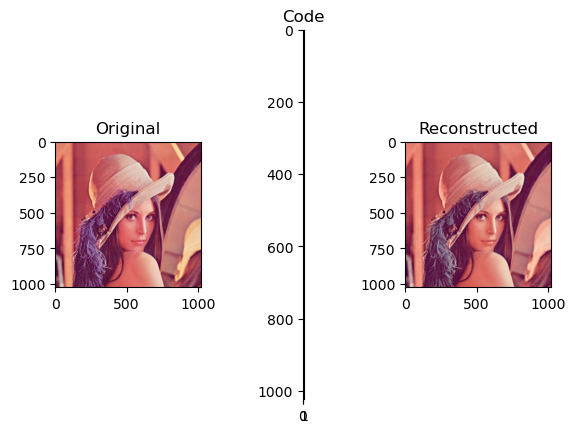

In [21]:
reconstruction_mse = autoencoder.evaluate(x_test, x_test, verbose=0)
print("Convolutional autoencoder MSE:", reconstruction_mse)
for i in range(1):
    img = x_test[i]
    visualize(img,encoder,decoder)

In [22]:
img = x_test[0]
code = encoder.predict(img[None])[0]
reco = decoder.predict(code[None])[0]

1/1 [==============================] - 0s 108ms/step


# PSNR

In [23]:
import cv2
psnr = cv2.PSNR(img, reco)
psnr

78.14626828428416

In [24]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(reco, cv2.COLOR_RGB2GRAY)

In [25]:
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

In [26]:
error, diff = mse(img1, img2)
print("Image matching Error between the two images:",error)

Image matching Error between the two images: 0.0005717521416954696


In [29]:
cv2.imshow("difference", diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x8212db0) is not the object's thread (0x18d61770).
Cannot move to target thread (0x8212db0)

QObject::moveToThread: Current thread (0x8212db0) is not the object's thread (0x18d61770).
Cannot move to target thread (0x8212db0)

QObject::moveToThread: Current thread (0x8212db0) is not the object's thread (0x18d61770).
Cannot move to target thread (0x8212db0)

QObject::moveToThread: Current thread (0x8212db0) is not the object's thread (0x18d61770).
Cannot move to target thread (0x8212db0)

QObject::moveToThread: Current thread (0x8212db0) is not the object's thread (0x18d61770).
Cannot move to target thread (0x8212db0)

QObject::moveToThread: Current thread (0x8212db0) is not the object's thread (0x18d61770).
Cannot move to target thread (0x8212db0)

QObject::moveToThread: Current thread (0x8212db0) is not the object's thread (0x18d61770).
Cannot move to target thread (0x8212db0)

QObject::moveToThread: Current thread (0x8212db0) is not the object's

In [49]:
#cv2.imwrite(filename, img)
cv2.imwrite("Difference_lena.png",diff)

True

In [51]:
lena = cv2.imread("Difference_lena.png", cv2.IMREAD_COLOR)

In [52]:
cv2.imshow("image", lena)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0xb957990) is not the object's thread (0x137e9040).
Cannot move to target thread (0xb957990)

QObject::moveToThread: Current thread (0xb957990) is not the object's thread (0x137e9040).
Cannot move to target thread (0xb957990)

QObject::moveToThread: Current thread (0xb957990) is not the object's thread (0x137e9040).
Cannot move to target thread (0xb957990)

QObject::moveToThread: Current thread (0xb957990) is not the object's thread (0x137e9040).
Cannot move to target thread (0xb957990)

QObject::moveToThread: Current thread (0xb957990) is not the object's thread (0x137e9040).
Cannot move to target thread (0xb957990)

QObject::moveToThread: Current thread (0xb957990) is not the object's thread (0x137e9040).
Cannot move to target thread (0xb957990)

QObject::moveToThread: Current thread (0xb957990) is not the object's thread (0x137e9040).
Cannot move to target thread (0xb957990)

QObject::moveToThread: Current thread (0xb957990) is not the object's

# Model Saving

In [31]:
autoencoder.save("lena_autoencoder2600.h5")

In [44]:
#autoencoder = load_model(model_filename.format(last_finished_epoch))
# encoder = autoencoder.layers[1]
# decoder = autoencoder.layers[2]

In [48]:
#cv2.imwrite(filename, img)

(1024, 1024)